<h1 align="center"> Machine Learning </h1>
<h2 align="center"> Coding Assignemt 2</h3>
<h5 align="center"> <font color="cyan"> Mohammad Hossein Shafieizadegan </font> </h5>
<h5 align="center"> <font color="cyan"> 99104781 </font></h5>

# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

In [3]:
# Select two different features from the dataset
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Get the selected features and labels
X = data.data[:, [feature1_index, feature2_index]]
y = data.target

# Get the class labels
target_names = data.target_names

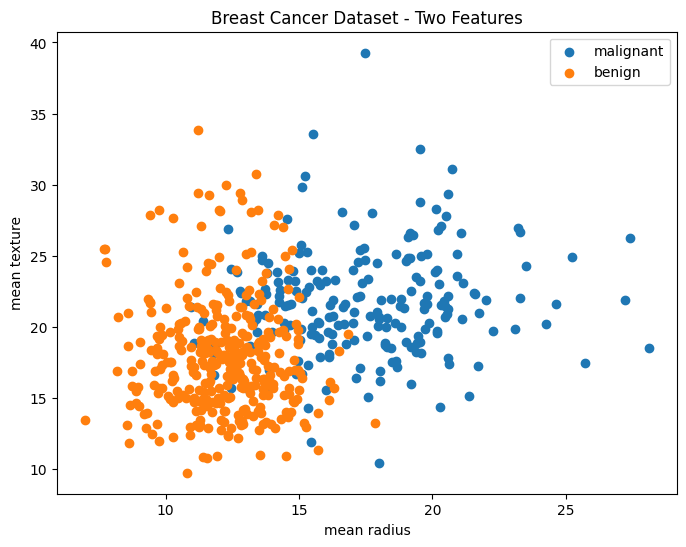

In [4]:
# Plot the data of each class
plt.figure(figsize=(8, 6))

for class_value in np.unique(y):
    # Get the indices of samples belonging to the current class
    indices = np.where(y == class_value)

    # Plot the samples of the current class
    plt.scatter(X[indices, 0], X[indices, 1], label=target_names[class_value])

plt.xlabel(data.feature_names[feature1_index])
plt.ylabel(data.feature_names[feature2_index])
plt.title('Breast Cancer Dataset - Two Features')
plt.legend()
plt.show()

In [5]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coef, p_value = pearsonr(X[:, 0], X[:, 1])

print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.3238
P-value: 2.3603743759227106e-15


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (398, 2)
Test set shape: (171, 2)


Decision Tree (Splitter: entropy, Depth: 2)


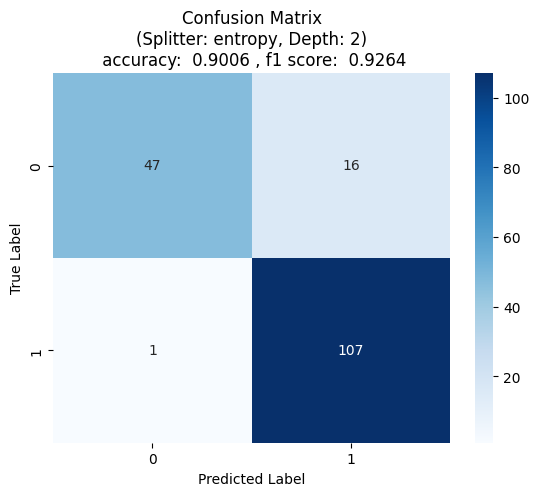

Decision Tree (Splitter: entropy, Depth: 5)


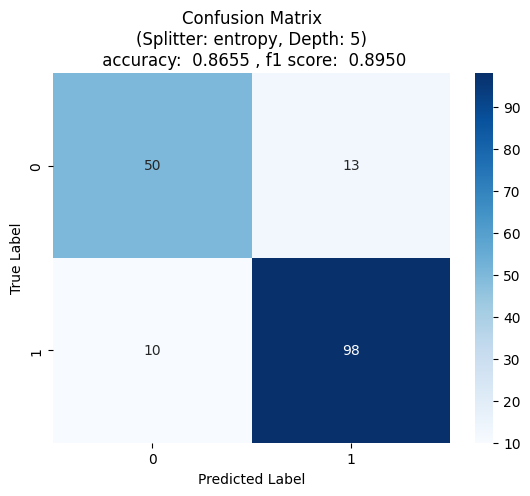

Decision Tree (Splitter: entropy, Depth: 10)


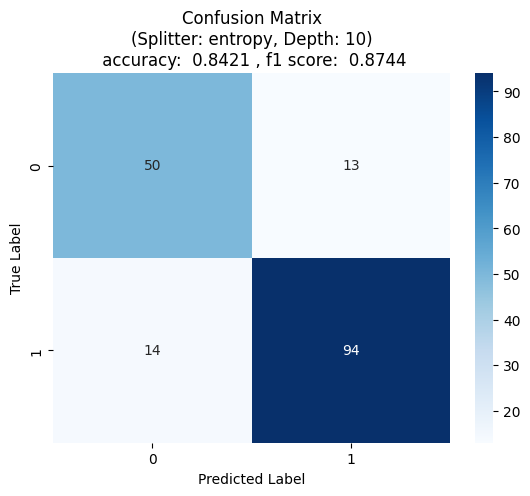

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

# Define the specifications for decision tree
splitter = 'entropy'
depths = [2, 5, 10]

# Fit and evaluate the decision tree for each depth
for depth in depths:
    # Create a decision tree classifier
    clf = DecisionTreeClassifier(criterion=splitter, max_depth=depth, random_state=42)


    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"Decision Tree (Splitter: {splitter}, Depth: {depth})")
 
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix\n(Splitter: {splitter}, Depth: {depth})\n accuracy: {accuracy: .4f} , f1 score: {f1: .4f}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()